In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: kaggle.json: No such file or directory
chmod: /Users/kaitlynli/.kaggle/kaggle.json: No such file or directory


In [3]:
!kaggle datasets download -d amitanshjoshi/spotify-1million-tracks

Dataset URL: https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks
License(s): ODbL-1.0
spotify-1million-tracks.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip spotify-1million-tracks.zip -d /mnt/data/

Archive:  spotify-1million-tracks.zip
checkdir:  cannot create extraction directory: /mnt/data
           No such file or directory


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

In [6]:
# tracks = pd.read_csv('/mnt/data/spotify_data.csv')
tracks = pd.read_csv('../spotify_data.csv')
tracks['genre'] = tracks['genre'].str.strip().str.lower()
tracks.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
tracks.dropna()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [7]:
# features for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms', 'time_signature']

# standardize feature cols
scaler = StandardScaler()
scaledTracks = scaler.fit_transform(tracks[features])

dbscan = DBSCAN(eps=0.7, min_samples=7)
tracks['cluster'] = dbscan.fit_predict(scaledTracks)

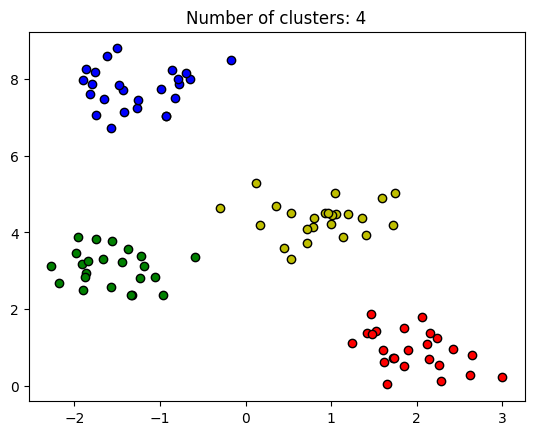

In [23]:
X, y_true = make_blobs(n_samples=100, centers=4,
                       cluster_std=0.50, random_state=0)

dbscan = dbscan.fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# number of clusters in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

In [22]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

# good enough clustering
# good recovery score

Silhouette Coefficient: 0.64
Adjusted Rand Index: 0.94


In [15]:
def recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, dbscan, n_recommendations=10):
    inputTrackName = inputTrackName.strip().lower()
    inputArtistName = inputArtistName.strip().lower()
    inputTrack = tracks[(tracks['track_name'].str.lower() == inputTrackName) & (tracks['artist_name'].str.lower() == inputArtistName)]

    if inputTrack.empty:
        print("Track not found in dataset")
        return pd.DataFrame()
    
    print("Input track found:")
    print(inputTrack)

    inputTrackFeatures = inputTrack[features]
    scaledInputTrackFeatures = scaler.transform(inputTrackFeatures)

    # get cluster
    inputCluster = inputTrack['cluster'].values[0]
    print(f"Predicted cluster: {inputCluster}")

    if inputCluster == -1:
        print("The input track is considered noise by DBSCAN and does not belong to any cluster.")
        return pd.DataFrame()

    # tracks from same cluster
    similarTracks = tracks[tracks['cluster'] == inputCluster]

    similarTracks = similarTracks[(similarTracks['track_name'].str.lower() != inputTrackName) | (similarTracks['artist_name'].str.lower() != inputArtistName)]

    # distances to input track
    similarTracksFeatures = scaler.transform(similarTracks[features])
    distances = euclidean_distances(scaledInputTrackFeatures, similarTracksFeatures).flatten()

    if len(distances) != len(similarTracks):
        print("Lengths of distances and similarTracks do not match. Skipping.")
        return pd.DataFrame()

    similarTracks['distance'] = distances

    # sort by distance and select top n_recommendations
    recommendations = similarTracks.sort_values(by=['distance', 'popularity'], ascending=[True, False]).drop_duplicates(subset=['artist_name', 'track_name']).head(n_recommendations)

    if len(recommendations) < n_recommendations:
        remaining = similarTracks[~similarTracks.index.isin(recommendations.index)].head(n_recommendations - len(recommendations))
        recommendations = pd.concat([recommendations, remaining])

    return recommendations[['artist_name', 'track_name', 'popularity', 'genre', 'year']]

inputTrackName = input("Enter track name: ")
inputArtistName = input("Enter artist name: ")
recommendations = recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, dbscan)

if recommendations.empty:
    print("No recommendations found")
else:
    print("Here are the top recommendations based on the inputted song:")
    print(recommendations[['artist_name', 'track_name', 'popularity', 'genre', 'year']])

Input track found:
        Unnamed: 0 artist_name track_name                track_id  popularity  \
461992      461992  The Weeknd  Heartless  6bnF93Rx87YqUBLSgjiMU8          84   

        year genre  danceability  energy  key  ...  mode  speechiness  \
461992  2020   pop         0.537   0.746   10  ...     0         0.15   

        acousticness  instrumentalness  liveness  valence    tempo  \
461992        0.0236          0.000001     0.156    0.252  170.062   

        duration_ms  time_signature  cluster  
461992       198267               4        2  

[1 rows x 21 columns]
Predicted cluster: 2
Here are the top recommendations based on the inputted song:
              artist_name                               track_name  \
1138676         The Roots                               I Remember   
85914             J. Cole                             Miss America   
447065   The Crabb Family             Sister, Play That Tambourine   
878330             C.P.V.                          

Input track found:
        Unnamed: 0 artist_name           track_name                track_id  \
243590      243590       Amoth  Shadow of the Beast  3SVk9xCiZt7tSh7vzqtDYZ   

        popularity  year        genre  danceability  energy  key  ...  mode  \
243590           0  2016  heavy-metal         0.383   0.861    9  ...     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
243590       0.0555       0.00334             0.292    0.0554    0.491   

          tempo  duration_ms  time_signature  cluster  
243590  110.078       391027               4       -1  

[1 rows x 21 columns]
Predicted cluster: -1
The input track is considered noise by DBSCAN and does not belong to any cluster.
Input track found:
         Unnamed: 0 artist_name         track_name                track_id  \
1105434     1388168  La Critica  Ya Se Peinó María  5weRMk5hP0utlRS6nYK1dM   

         popularity  year  genre  danceability  energy  key  ...  mode  \
1105434          19  2010

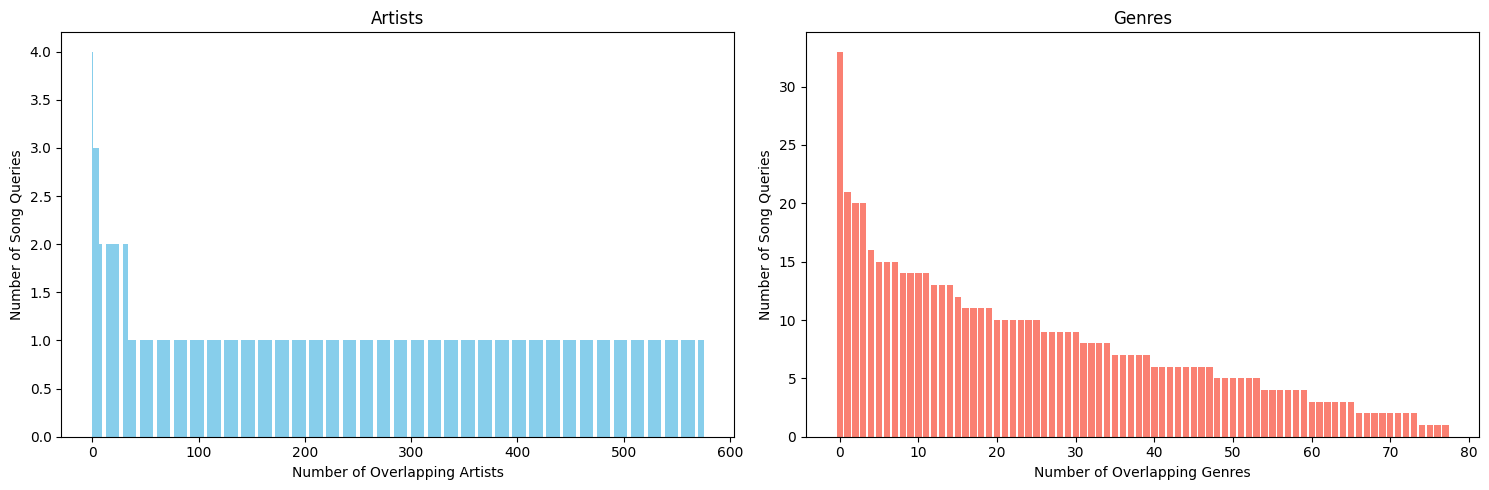

In [16]:
np.random.seed(69)
random_indices = np.random.choice(tracks.index, size=100, replace=False)
random_queries = tracks.iloc[random_indices]
all_artists = defaultdict(int)
all_genres = defaultdict(int)

for idx, row in random_queries.iterrows():
    inputTrackName = row['track_name']
    inputArtistName = row['artist_name']
    recommendations = recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, dbscan)
    
    if recommendations.empty:
        continue
    
    for idx, recommendation in recommendations.iterrows():
        artist = recommendation['artist_name']
        genre = recommendation['genre']
        all_artists[artist] += 1
        all_genres[genre] += 1

artists_df = pd.DataFrame(list(all_artists.items()), columns=['Artist', 'Count']).sort_values(by='Count', ascending=False)
genres_df = pd.DataFrame(list(all_genres.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.bar(range(len(genres_df)), genres_df['Count'], color='salmon')
plt.xlabel('Number of Overlapping Genres')
plt.ylabel('Number of Song Queries')
plt.title('Genres')
plt.subplot(1, 2, 1)
plt.bar(range(len(artists_df)), artists_df['Count'], color='skyblue')
plt.xlabel('Number of Overlapping Artists')
plt.ylabel('Number of Song Queries')
plt.title('Artists')

plt.tight_layout()
plt.show()